# Logistic Regression


### Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')
sns.set_style('whitegrid')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Filtering missing data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


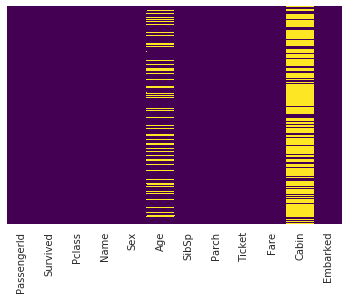

In [7]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

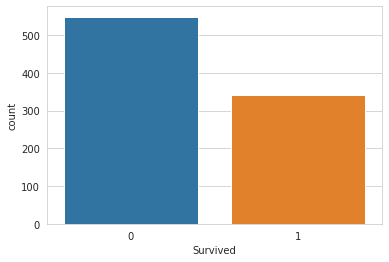

In [8]:
# Number of survivor plot vs non-survivor (0,1)
sns.countplot(x='Survived',data=df)

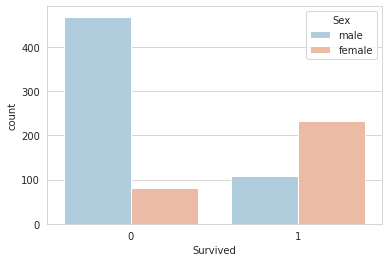

In [9]:
# Number of survivor plot vs non-survivor (0,1) based on gender
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

In [10]:
df['Sex'].value_counts().head()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Sex'].count()

891

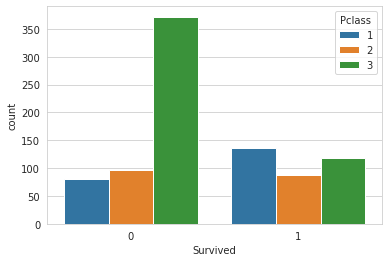

In [12]:
# Base on paseenger class 1 = first class 3 = third class
sns.countplot(x='Survived',data=df,hue='Pclass')

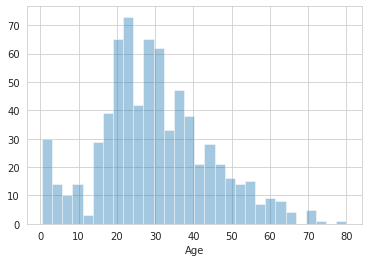

In [13]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)
# More younger passenger

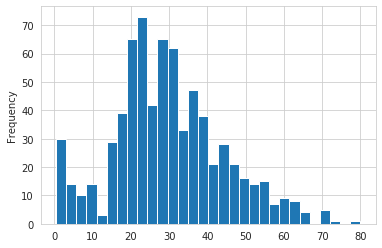

In [14]:
df['Age'].dropna().plot.hist(bins=30)

In [15]:
df[df['Survived'] == 1]['Age'].value_counts().head(40)

24.0    15
36.0    11
35.0    11
27.0    11
22.0    11
30.0    10
19.0     9
32.0     9
18.0     9
29.0     8
31.0     8
28.0     7
4.0      7
34.0     6
42.0     6
26.0     6
40.0     6
16.0     6
25.0     6
48.0     6
33.0     6
17.0     6
23.0     5
1.0      5
50.0     5
45.0     5
21.0     5
3.0      5
38.0     5
39.0     5
49.0     4
5.0      4
15.0     4
14.0     3
20.0     3
54.0     3
58.0     3
52.0     3
2.0      3
44.0     3
Name: Age, dtype: int64

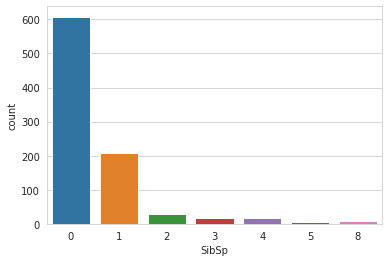

In [16]:
sns.countplot(x='SibSp',data=df)

In [17]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

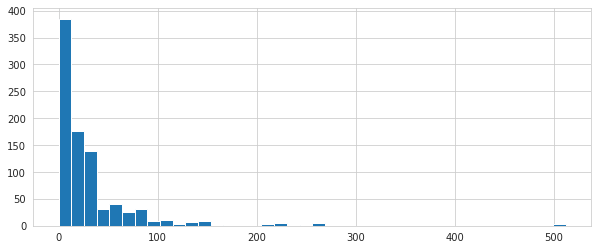

In [18]:
df['Fare'].hist(bins=40,figsize=(10,4))

In [19]:
import cufflinks as cf


In [20]:
cf.go_offline()

In [83]:
df['Fare'].iplot(kind='hist',bins=40)

### Data Cleaning

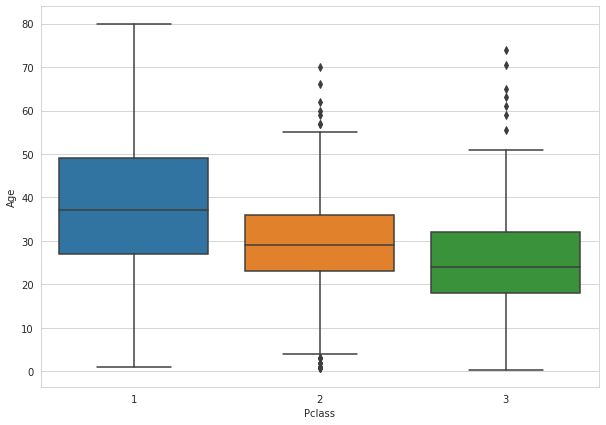

In [22]:
# Substitute missing values for age with mean age by Imputation
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [23]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 3:
            return 25
        elif Pclass == 2:
            return 29
        else:
            return 38
    else:
        return Age

In [25]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

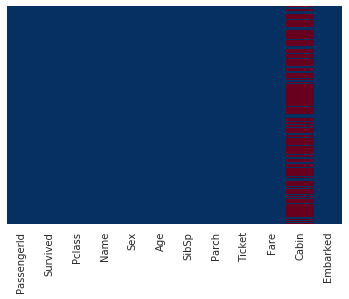

In [26]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='RdBu_r')

In [27]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# Drop Cabin column due to many missing data
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df.dropna(inplace=True)

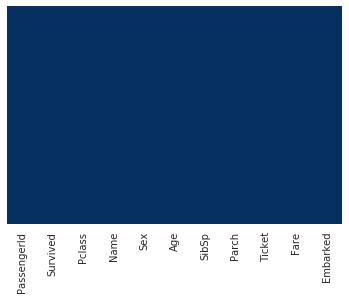

In [31]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='RdBu_r')

In [32]:
# Dummy Variable for Sex and Embark
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [33]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [35]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
train = pd.concat([df,sex,embarked],axis=1)

In [37]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [38]:
train.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.drop('PassengerId',axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Training and Testing Data

In [42]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [43]:
# test csv must undergo same cleaning process just like the train set but for this exercise
# train set will be treated as the whole data set
# y == target actual label predictions
# X == features
X = train.drop('Survived',axis=1)
y = train['Survived']


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
# Model
logmodel = LogisticRegression()

In [71]:
logmodel.fit(X_train,y_train)

/home/ai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predictions = logmodel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
# y_test (True value)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [77]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]])